In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"D:\Ultimate Programming\Data Bases\Customers Data.csv", encoding="latin-1")
df.head(3)

,CustomerKey,Prefix,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,MR.,JON,YANG,04-08-1966,M,M,jon24@adventure-works.com,"$90,000",2,Bachelors,Professional,Y
1,11001,MR.,EUGENE,HUANG,5/14/1965,S,M,eugene10@adventure-works.com,"$60,000",3,Bachelors,Professional,N
2,11002,MR.,RUBEN,TORRES,08-12-1965,M,M,ruben35@adventure-works.com,"$60,000",3,Bachelors,Professional,Y


In [8]:
df['AnnualIncome'] = df['AnnualIncome'].str.replace("$", "").str.replace(",", "").astype(int)

In [9]:
df.isnull().sum()

CustomerKey         0
Prefix            130
FirstName           0
LastName            0
BirthDate           0
MaritalStatus       0
Gender            130
EmailAddress        0
AnnualIncome        0
TotalChildren       0
EducationLevel      0
Occupation          0
HomeOwner           0
dtype: int64

In [10]:
x = df[['AnnualIncome', 'TotalChildren']]
y = df['HomeOwner']

In [12]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
for col in x.columns:
    x[col] = ss.fit_transform(x[[col]])

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [30]:
lr.score(x_test, y_test)*100

67.38292011019283

# Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

gb = GaussianNB()
gb.fit(x_train, y_train)

GaussianNB()

In [23]:
gb.score(x_test, y_test)*100

67.52066115702479

# Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [25]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [26]:
dt.score(x_test, y_test)*100

69.9724517906336

In [28]:
print(dt.predict([[1.015363, 0.096]])) # Y
print(dt.predict([[0.0847, 0.071]])) # n
print(dt.predict([[0.0847, 0.716]])) # Y
print(dt.predict([[0.3949, -1.142]])) # n

['Y']
['Y']
['Y']
['N']


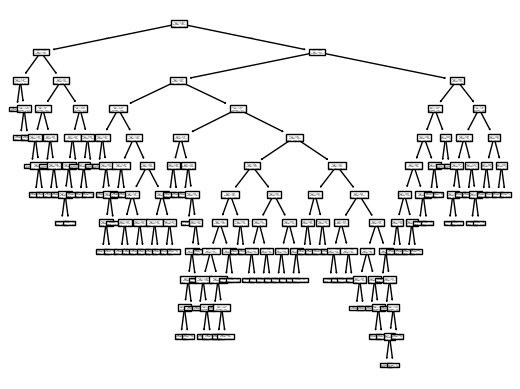

In [32]:
from sklearn.tree import plot_tree
plot_tree(dt)
plt.show()